# Introduction
# Providing Travel Recommendations Using Machine Learning
# Goal:
## My project aims to develop a machine learning-based solution that provides personalized recommendations for travelers based on their preferences and past travel history
# Data Overview
My data is sourced directly from Yelp. The files were originally in JSON format and were converted to CSV prior to this exploration. 
In this notebook, I'll be exploring three different files business, user, and review data. 

#### Packages Import

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Business Data Set
#### Data Dictionary
- **business_id**  	Unique identifier for the business  	**string**
- **name**	        Name of the business	                **string**
- **address**	Address where the business is located	**string**
- **city**	City where the business is located	**string**
- **state**	State where the business is located	**string**
- **postal_code**	postal_code where the business is located	**string**
- **latitude**	Geographical latitude of the business	**float64**
- **longitude**	Geographical longitude of the business	**float64**
- **stars**	Star rating of the business	**float64**
- **review_count**	Number of reviews the business has received	**int64**
- **is_open**	0 is closed and 1 is open	**int64**
- **attributes**	Attribute: Boolean	**string-Dict**
- **categories**	Categories the business falls under	**string**
- **hours**	Day of the week: Hours of operation	**string-Dict**

In [6]:
# Reading CSV file into notebook and saving it to pandas df
df_b = pd.read_csv('data/yelp_business.csv', index_col=0)

In [7]:
# Quick peak into data 
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [9]:
# Quick check to count the number of null values per column
df_b.isna().sum()

business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [18]:
# Check for duplicate rows 
df_b[df_b.duplicated()].sum()

business_id     0.0
name            0.0
address         0.0
city            0.0
state           0.0
postal_code     0.0
latitude        0.0
longitude       0.0
stars           0.0
review_count    0.0
is_open         0.0
attributes      0.0
categories      0.0
hours           0.0
dtype: float64

## Business Details
The first eight columns contain information about the business, such as a business id, name of the business, address, city, state, postal code, and geo-location coordinates.

**Address**

In [20]:
df_b['address'].isna().sum()
# null values will need to be address later 

5127

**City**

In [22]:
df_b['city'].value_counts()

Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: city, Length: 1416, dtype: int64

Interestingly, there seems to be significantly more cities represented in the dataset than initially expected. I will have to do a deeper investigation as the majority could represent suburbs surrounding major metropolitan areas.

In [39]:
# Save value counts of city column to new data frame
vc_city = df_b['city'].value_counts()

In [37]:
# returns cities with more than 1500 business entries
print(vc_city[vc_city > 1500])

Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Name: city, dtype: int64


**State**

In [40]:
df_b['state'].value_counts()

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

Data represent various states across the US and Canada

**Postal Code**

In [21]:
df_b['postal_code'].isna().sum()
# null values will need to be addressed later 

73

In [36]:
df_b['postal_code'].value_counts()

93101      1866
89502      1804
70130      1512
19103      1362
19107      1353
           ... 
46211         1
T5K 1C4       1
T6G 0W8       1
T5H 0R8       1
T5J 4X6       1
Name: postal_code, Length: 3361, dtype: int64

An interesting thing to note is that Canadian postal codes have a noticablly format; the incorporation of nonnumeric values may be another layer of difficulty when performing an analysis. 

## Stars 
Column contains the average of all user ratings for a business.

In [43]:
df_b['stars'].value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

In [46]:
df_b['stars'].agg('average')

3.5967235576603303

Star ratings are given in increments of .5 with 4.0 the most common rating given to businesses and 3.6 the being the average rating. 

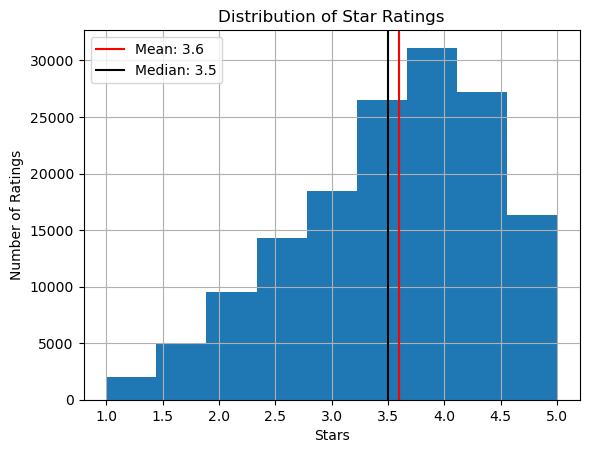

In [67]:
# Histogram distribution for review ratings
mean = round(df_b['stars'].mean(),2)
median = df_b['stars'].median()

df_b['stars'].hist(bins=9) 
plt.xlabel('Stars')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Star Ratings')

plt.axvline(mean, color='red', label=f'Mean: {mean}')
plt.axvline(median, color='black', label=f'Median: {median}')
plt.legend()

plt.show()

Plot visualizes a slightly right-skewed distribution. Users tend to give higher ratings. 

In [68]:
plt.savefig('figures/BusinessRatingsDistribution.png')

<Figure size 640x480 with 0 Axes>

## Review Count 
The column contains a count of the number of user reviews for each business.

<Axes: xlabel='review_count'>

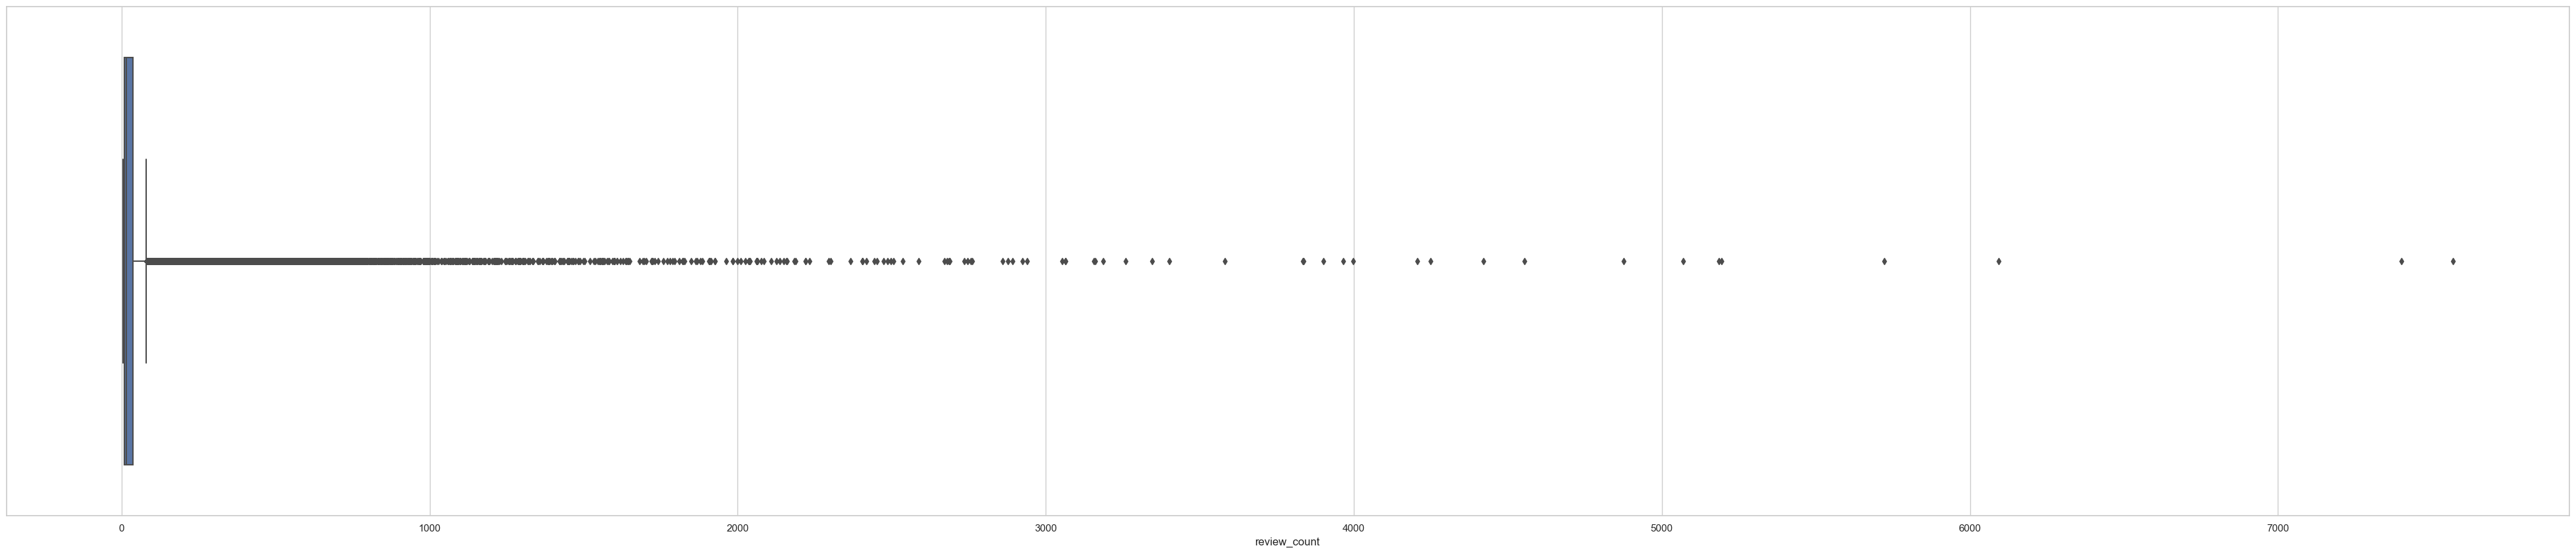

In [86]:
# Boxplot of review count
# Resource: https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/
# Create a figure with a specific size
plt.figure(figsize=(50, 10))
# use to set style of background of plot
sns.set(style="whitegrid")
 
sns.boxplot(x =df_b['review_count'])

In [83]:
round(df_b['review_count'].mean(),2)

44.87

In [85]:
df_b['review_count'].median()

15.0

The plot wasn't the best visual, but it did highlight the enormous range in the number of reviews a business receives. You can also get a sense of spread from the median and mean, the latter being significantly higher at 45 average reviews per business. 

## Is Open
The binary column indicates where a business is still open and operating or permanently closed.

In [87]:
# Count of open and closed businesses
df_b['is_open'].value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

30,648 businesses are closed which accounts for 20% of the data. On the surface, you probably wouldn't want 'out-of-date' data; however, for my project, it could still be helpful to make connections between users and businesses that they visited, regardless of whether they are still open. 

## Attributes
The column contains a dictionary containing a set of attributes that are different for each business category and the boolean value represents whether the business offers that attribute or not.

In [ ]:
# May drop, it may be too computationally expensive to flatten 

## Categories
[Yelp Categories](https://blog.yelp.com/businesses/yelp_category_list/)<br/>
The column contains a list of categories the business falls under; for more info, click the link above, where Yelp provides a breakdown of their category organization. 

In [109]:
# Need to drop rows with empty categories
df_b['categories'].isna().sum()

103

In [41]:
# Need to flatten or explode subcategories into there own column 

In [ ]:
# Need to drop categories not relevant for travel

In [138]:
# initialize list using counts of each main category
category_counts = [['Restaurants', df_b['categories'].str.contains("Restaurants").fillna(False).sum()], 
        ['Food', df_b['categories'].str.contains(", Food,").fillna(False).sum()], 
        ['Active Life', df_b['categories'].str.contains("Active Life").fillna(False).sum()],
        ['Arts & Entertainment', df_b['categories'].str.contains("Arts & Entertainment").fillna(False).sum()],
        ['Hotels & Travel', df_b['categories'].str.contains("Hotels & Travel").fillna(False).sum()],
        ['Nightlife', df_b['categories'].str.contains("Nightlife").fillna(False).sum()]]
 
# Create the pandas DataFrame
df_categories = pd.DataFrame(category_counts, columns=['Category', 'Count'])

# Sort Values
df_categories = df_categories.sort_values('Count', ascending=False)
# print dataframe.
print(df_categories)

               Category  Count
0           Restaurants  52268
1                  Food  14533
5             Nightlife  12281
2           Active Life   7687
4       Hotels & Travel   5857
3  Arts & Entertainment   5434


In [144]:
# Get a total count of all travel related businesses
df_categories['Count'].sum()

98060

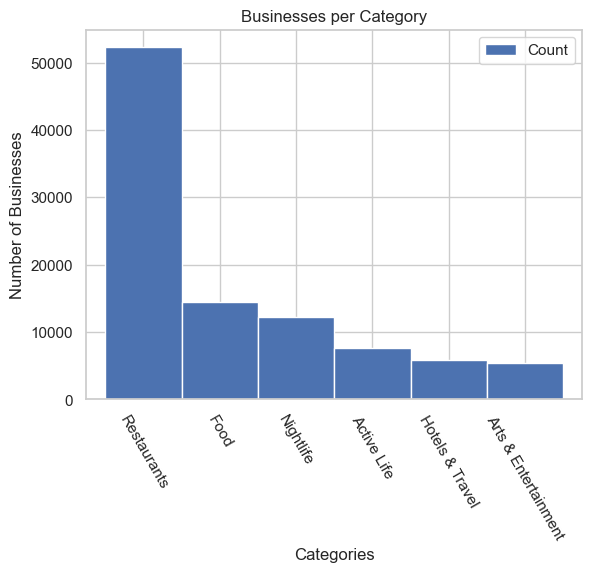

In [140]:
df_categories.plot('Category', 'Count', kind='bar', width=1)

# Rotating X-axis labels
plt.xticks(rotation = -60)
 
# Setting title and axis labels
plt.title('Businesses per Category')
plt.xlabel("Categories")
plt.ylabel("Number of Businesses")
 
# Show plot
plt.show()

These six categories represent the businesses you typically would visit when traveling. <br>
Restaurants are by far the most represented business category, this category is further broken down by the type of cuisine served. The food category is a catch-all category for any food-related business that isn't a restaurant—places like bakeries, coffee shops, pastry shops, food trucks, etc. The nightlife category contains businesses such as bars, comedy clubs, dance clubs, etc. Active life includes Amusement parks, experiences, parks, zoos, etc. The hotels & travel category can include hotels, hostels, tours, vacation rentals, etc. Lastly, the least represented group can include places such as cultural centers, festivals, museums, etc. In total, I have almost 100,000 businesses I can use for the model. 

In [141]:
# Save bar chart to file
plt.savefig('figures/BusinessMainCategoriesChart.png')

<Figure size 640x480 with 0 Axes>

## Hours
The column contains a dictionary of business hours by day of the week.

In [ ]:
# May drop, it may be too computationally expensive to flatten 

# User Data Set
#### Data Dictionary
- **user_id**  	Unique identifier for each user  	**string**
- **name**	        Name of user	                **string**
- **review_count**	Number of reviews by user	**int64**
- **yelping_since**	Date account opened	**Datetime**
- **useful**	Count of how many other users found current user reviews useful	**int64**
- **funny**	Count of how many other users found current user reviews funny	**int64**
- **cool**	Count of how many other users found current user reviews cool	**int64**
- **elite**	years user was labeled as elite reviewer	**string**
- **friends**	list of friends user ids	**string**
- **fans**	number of other users considered fans	**int64**
- **average_stars**	average number of stars given to businesses	**float64**
- **compliment_hot**	compliments received labeled as hot	**int64**
- **compliment_more**	compliments received labeled as more	**int64**
- **compliment_profile**	compliments received labeled as profile	**int64**
- **compliment_cute**	compliments received labeled as cute	**int64**
- **compliment_list**	compliments received labeled as list	**int64**
- **compliment_note**	compliments received labeled as note	**int64**
- **compliment_plain**	compliments received labeled as plain	**int64**
- **compliment_cool**	compliments received labeled as cool	**int64**
- **compliment_funny**	compliments received labeled as funny	**int64**
- **compliment_writer**	compliments received labeled as writer	**int64**
- **compliment_photos**	compliments received labeled as photos	**int64**

In [150]:
# Reading CSV file into notebook and saving it to pandas df
df_u = pd.read_csv('data/yelp_user.csv', index_col=0)

In [151]:
# Quick peak into data 
df_u.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,1,3.54,...,1,0,0,0,1,1,0,0,0,0


In [152]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987897 entries, 0 to 1987896
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   fans                int64  
 9   average_stars       float64
 10  compliment_hot      int64  
 11  compliment_more     int64  
 12  compliment_profile  int64  
 13  compliment_cute     int64  
 14  compliment_list     int64  
 15  compliment_note     int64  
 16  compliment_plain    int64  
 17  compliment_cool     int64  
 18  compliment_funny    int64  
 19  compliment_writer   int64  
 20  compliment_photos   int64  
dtypes: float64(1), int64(16), object(4)
memory usage: 333.7+ MB


In [153]:
# Quick check to count the number of null values per column
df_u.isna().sum()

user_id                     0
name                        8
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
elite                 1896699
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos           0
dtype: int64

In [164]:
# Check for duplicate rows 
df_u[df_u.duplicated()].sum()

user_id               0.0
name                  0.0
review_count          0.0
yelping_since         0.0
useful                0.0
funny                 0.0
cool                  0.0
elite                 0.0
fans                  0.0
average_stars         0.0
compliment_hot        0.0
compliment_more       0.0
compliment_profile    0.0
compliment_cute       0.0
compliment_list       0.0
compliment_note       0.0
compliment_plain      0.0
compliment_cool       0.0
compliment_funny      0.0
compliment_writer     0.0
compliment_photos     0.0
dtype: float64

## Users
First column is a unique identifier assigned by Yelp for each user. Second column provides the users first name.

In [ ]:
# May need to drop 8 rows that are missing user names

## Review Count
Column contains a count of how many reviews a user has provided.

In [ ]:
# Histogram of review counts for all users

## Yelping Since
Column contains the date the user created their Yelp account.

In [ ]:
# Possibly unrelated to my goal but could preform a time series of register user on the site and spot any trends

In [155]:
# Need to convert to date time

## Review Feedback
Columns useful, funny, and cool all provide a count of feedback received from other users regarding their written reviews.

In [ ]:
# Visualize responses to user reviews 

## Elite 
List of years a user was considered an 'elite' reviewer

In [ ]:
# May drop this column not sure is this will add value 

## Friends - Dropped
The column contains a list of other user IDs who have connected as friends within the Yelp platform.
The column was deleted before import to reduce the size of the data for computational efficiency. 

## Fans
Column contains a count of how many fans each user has. 

In [ ]:
# Histogram of distribution of fans

## Average Stars
Column contains average of all user ratings for businesses  

In [ ]:
# Create distribution plot of ratings 

## Compliments 
The last 11 columns contain counts for various compliments that other users can send each other. 

In [ ]:
# Visualize the amount of compliments users receive

# Review Data Set
#### Data Dictionary
- **review_id**  	Unique identifier for each review  	**string**
- **user_id**  	Unique identifier for each user  	**string**
- **business_id**  	Unique identifier for businesses  	**string**
- **stars**	rating given to the business between 1 and 5	**float64**
- **useful**	count of users who found the review useful	**string**
- **funny**	count of users who found the review funny	**string**
- **cool**	count of users who found the review cool	**int64**
- **text**	text of the review	**int64**
- **date**	date the user submitted the review	**datetime**

In [158]:
# Reading CSV file into notebook and saving it to pandas df
df_r = pd.read_csv('data/yelp_review.csv', index_col=0)

In [166]:
# Shape of data frame
df_r.shape

(6990280, 8)

In [159]:
# Quick peak into data 
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,2017-01-14 20:54:15


In [160]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   date         object 
dtypes: float64(1), int64(3), object(4)
memory usage: 480.0+ MB


In [161]:
# Quick check to count the number of null values per column
df_r.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
date           0
dtype: int64

In [163]:
# Check for duplicate rows 
df_r[df_r.duplicated()].sum()

review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
date           0.0
dtype: float64

The data set needs minimal cleaning; there is definitely a lot of value to be discovered as I explore relationships between users, businesses, and their ratings. 

## Unique Identifiers
The first column contains a unique identifier for each review. The second and Third column are foreign keys to link with the business and user data tables.  

In [ ]:
# Count NaNs

## Stars
Column contains the rating between 1 and 5 given to the specificfied business. 

In [ ]:
# Create a distribution plot for stars 

## Review Feedback
Columns useful, funny, and cool all provide a count of feedback received from other users regarding their written review.

In [ ]:
# May be unrelated to my goal but I could find correlations between feedback and stars given to a business 

## Text - Dropped
The column contains the user's written review.
The column was deleted before import to reduce the size of the data for computational efficiency. 
I may do a separate NLP analysis in the future to gain potential insights. 

## Date
Column contains a date-time object for the date the review was submitted. 

In [ ]:
# Time series analysis?